##### 
# Insurance Claim Prediction
# __________________________________________________________________


## Predict whether the policyholder will file a claim in the next 6 months or not.
---------------------------------------


### Problem Statement
---------------------------------------
* CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the highest claim settlement ratio. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.


* As it's a fast growing startup, the company would like to optimize the cost of the insurance by identifying the policyholders who are more likely to claim in the next 6 months. 

* **Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months**. The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.





### About the Dataset
--------------------------------------
* You are provided with information on policyholders containing the attributes like policy tenure, age of the car, age of the car owner, population density of the city, make and model of the car, power, engine type, etc and the target variable indicating whether the policyholder files a claim in the next 6 months or not.



##### Data Dictionary
--------------------------------------
* The train and test set contains information about different insurance policy holders. The train set includes the target variable is_claim whereas in the test set, you need to predict the target variable is_claim.

##### 
# INITIALIZING
-----------------------------
##### 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split , KFold , GridSearchCV , cross_val_score
from sklearn.preprocessing import StandardScaler , RobustScaler , MinMaxScaler , power_transform
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.api import Logit
from sklearn.metrics import precision_score , f1_score , recall_score , classification_report , confusion_matrix
from sklearn.metrics import accuracy_score , roc_curve , plot_roc_curve
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.proportion import proportions_ztest
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the train data and test data

train = pd.read_csv("train_qWM28Yl.csv")
test = pd.read_csv("test_zo1G9sv.csv")
data = pd.concat((train,test),ignore_index=True)
print('Data Shape :',data.shape,'\nTrain Shape :',test.shape,'\nTrain Shape :',train.shape)

# Target Variable is is_claim.

Data Shape : (97655, 44) 
Train Shape : (39063, 43) 
Train Shape : (58592, 44)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         97655 non-null  object 
 1   policy_tenure                     97655 non-null  float64
 2   age_of_car                        97655 non-null  float64
 3   age_of_policyholder               97655 non-null  float64
 4   area_cluster                      97655 non-null  object 
 5   population_density                97655 non-null  int64  
 6   make                              97655 non-null  int64  
 7   segment                           97655 non-null  object 
 8   model                             97655 non-null  object 
 9   fuel_type                         97655 non-null  object 
 10  max_torque                        97655 non-null  object 
 11  max_power                         97655 non-null  object 
 12  engi

In [4]:
data.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,97655.000000,97655.000000,97655.000000,97655.00000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,58592.000000
mean,0.611269,0.069508,0.469287,18822.60809,1.763586,3.138109,1161.655829,3.624423,5.245579,4.853024,3850.017715,1672.050187,1553.214500,1384.966750,1.759664,0.063968
std,0.414494,0.056774,0.122560,17656.79257,1.135832,1.831993,266.560176,0.484274,0.430432,0.228059,311.745860,112.042508,79.385788,212.543007,1.388415,0.244698
min,0.002735,0.000000,0.288462,290.00000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000,0.000000
25%,0.209729,0.020000,0.375000,6112.00000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000,0.000000
50%,0.573891,0.060000,0.451923,8794.00000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000,0.000000
75%,1.039740,0.110000,0.548077,27003.00000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.00000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000,1.000000


In [5]:
data.isnull().sum()

# No missing values

policy_id                               0
policy_tenure                           0
age_of_car                              0
age_of_policyholder                     0
area_cluster                            0
population_density                      0
make                                    0
segment                                 0
model                                   0
fuel_type                               0
max_torque                              0
max_power                               0
engine_type                             0
airbags                                 0
is_esc                                  0
is_adjustable_steering                  0
is_tpms                                 0
is_parking_sensors                      0
is_parking_camera                       0
rear_brakes_type                        0
displacement                            0
cylinder                                0
transmission_type                       0
gear_box                          

In [6]:
data.head().T

,0,1,2,3,4
policy_id,ID00001,ID00002,ID00003,ID00004,ID00005
policy_tenure,0.515874,0.672619,0.84111,0.900277,0.596403
age_of_car,0.05,0.02,0.02,0.11,0.11
age_of_policyholder,0.644231,0.375,0.384615,0.432692,0.634615
area_cluster,C1,C2,C3,C4,C5
population_density,4990,27003,4076,21622,34738
make,1,1,1,1,2
segment,A,A,A,C1,A
model,M1,M1,M1,M2,M3
fuel_type,CNG,CNG,CNG,Petrol,Petrol


##### 
# UNIVARIATE ANALYSIS
--------------------

##### 
### NUMERICAL COLUMNS
##### 

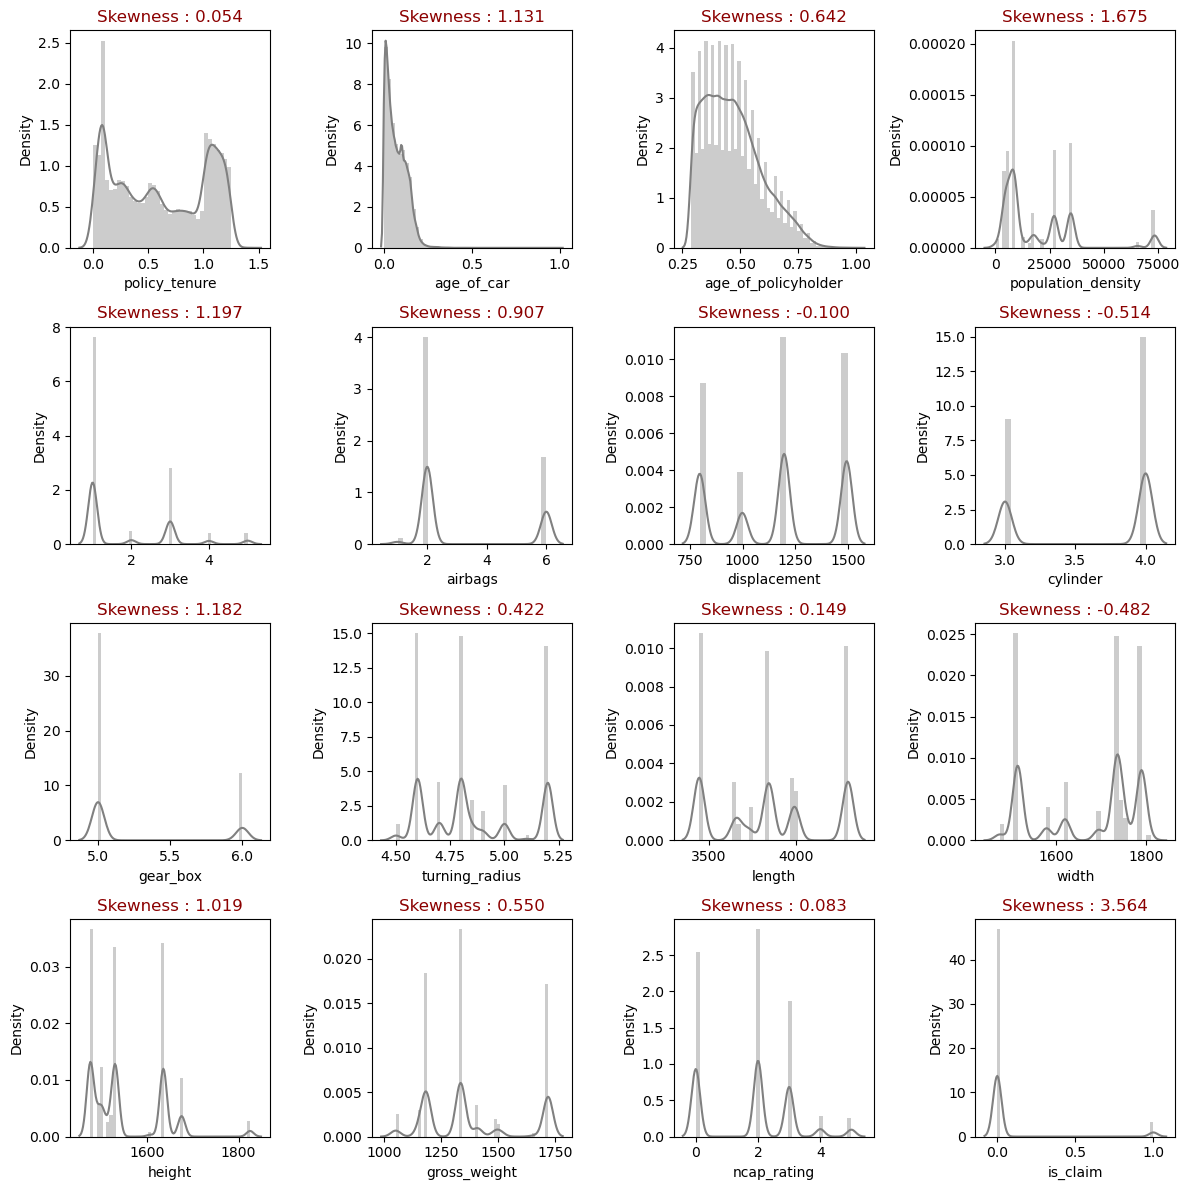

In [323]:
num_cols = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(12,12))
j=1
for i in num_cols:
    plt.subplot(4,4,j)
    sns.distplot(data[i],color='grey')
    plt.title('Skewness : %.3f'%(data[i].skew()),{'color': 'darkred'})
    j+=1
plt.tight_layout()
plt.show()

##### 
### CATEGORICAL COLUMNS
##### 

<Figure size 2560x1920 with 0 Axes>

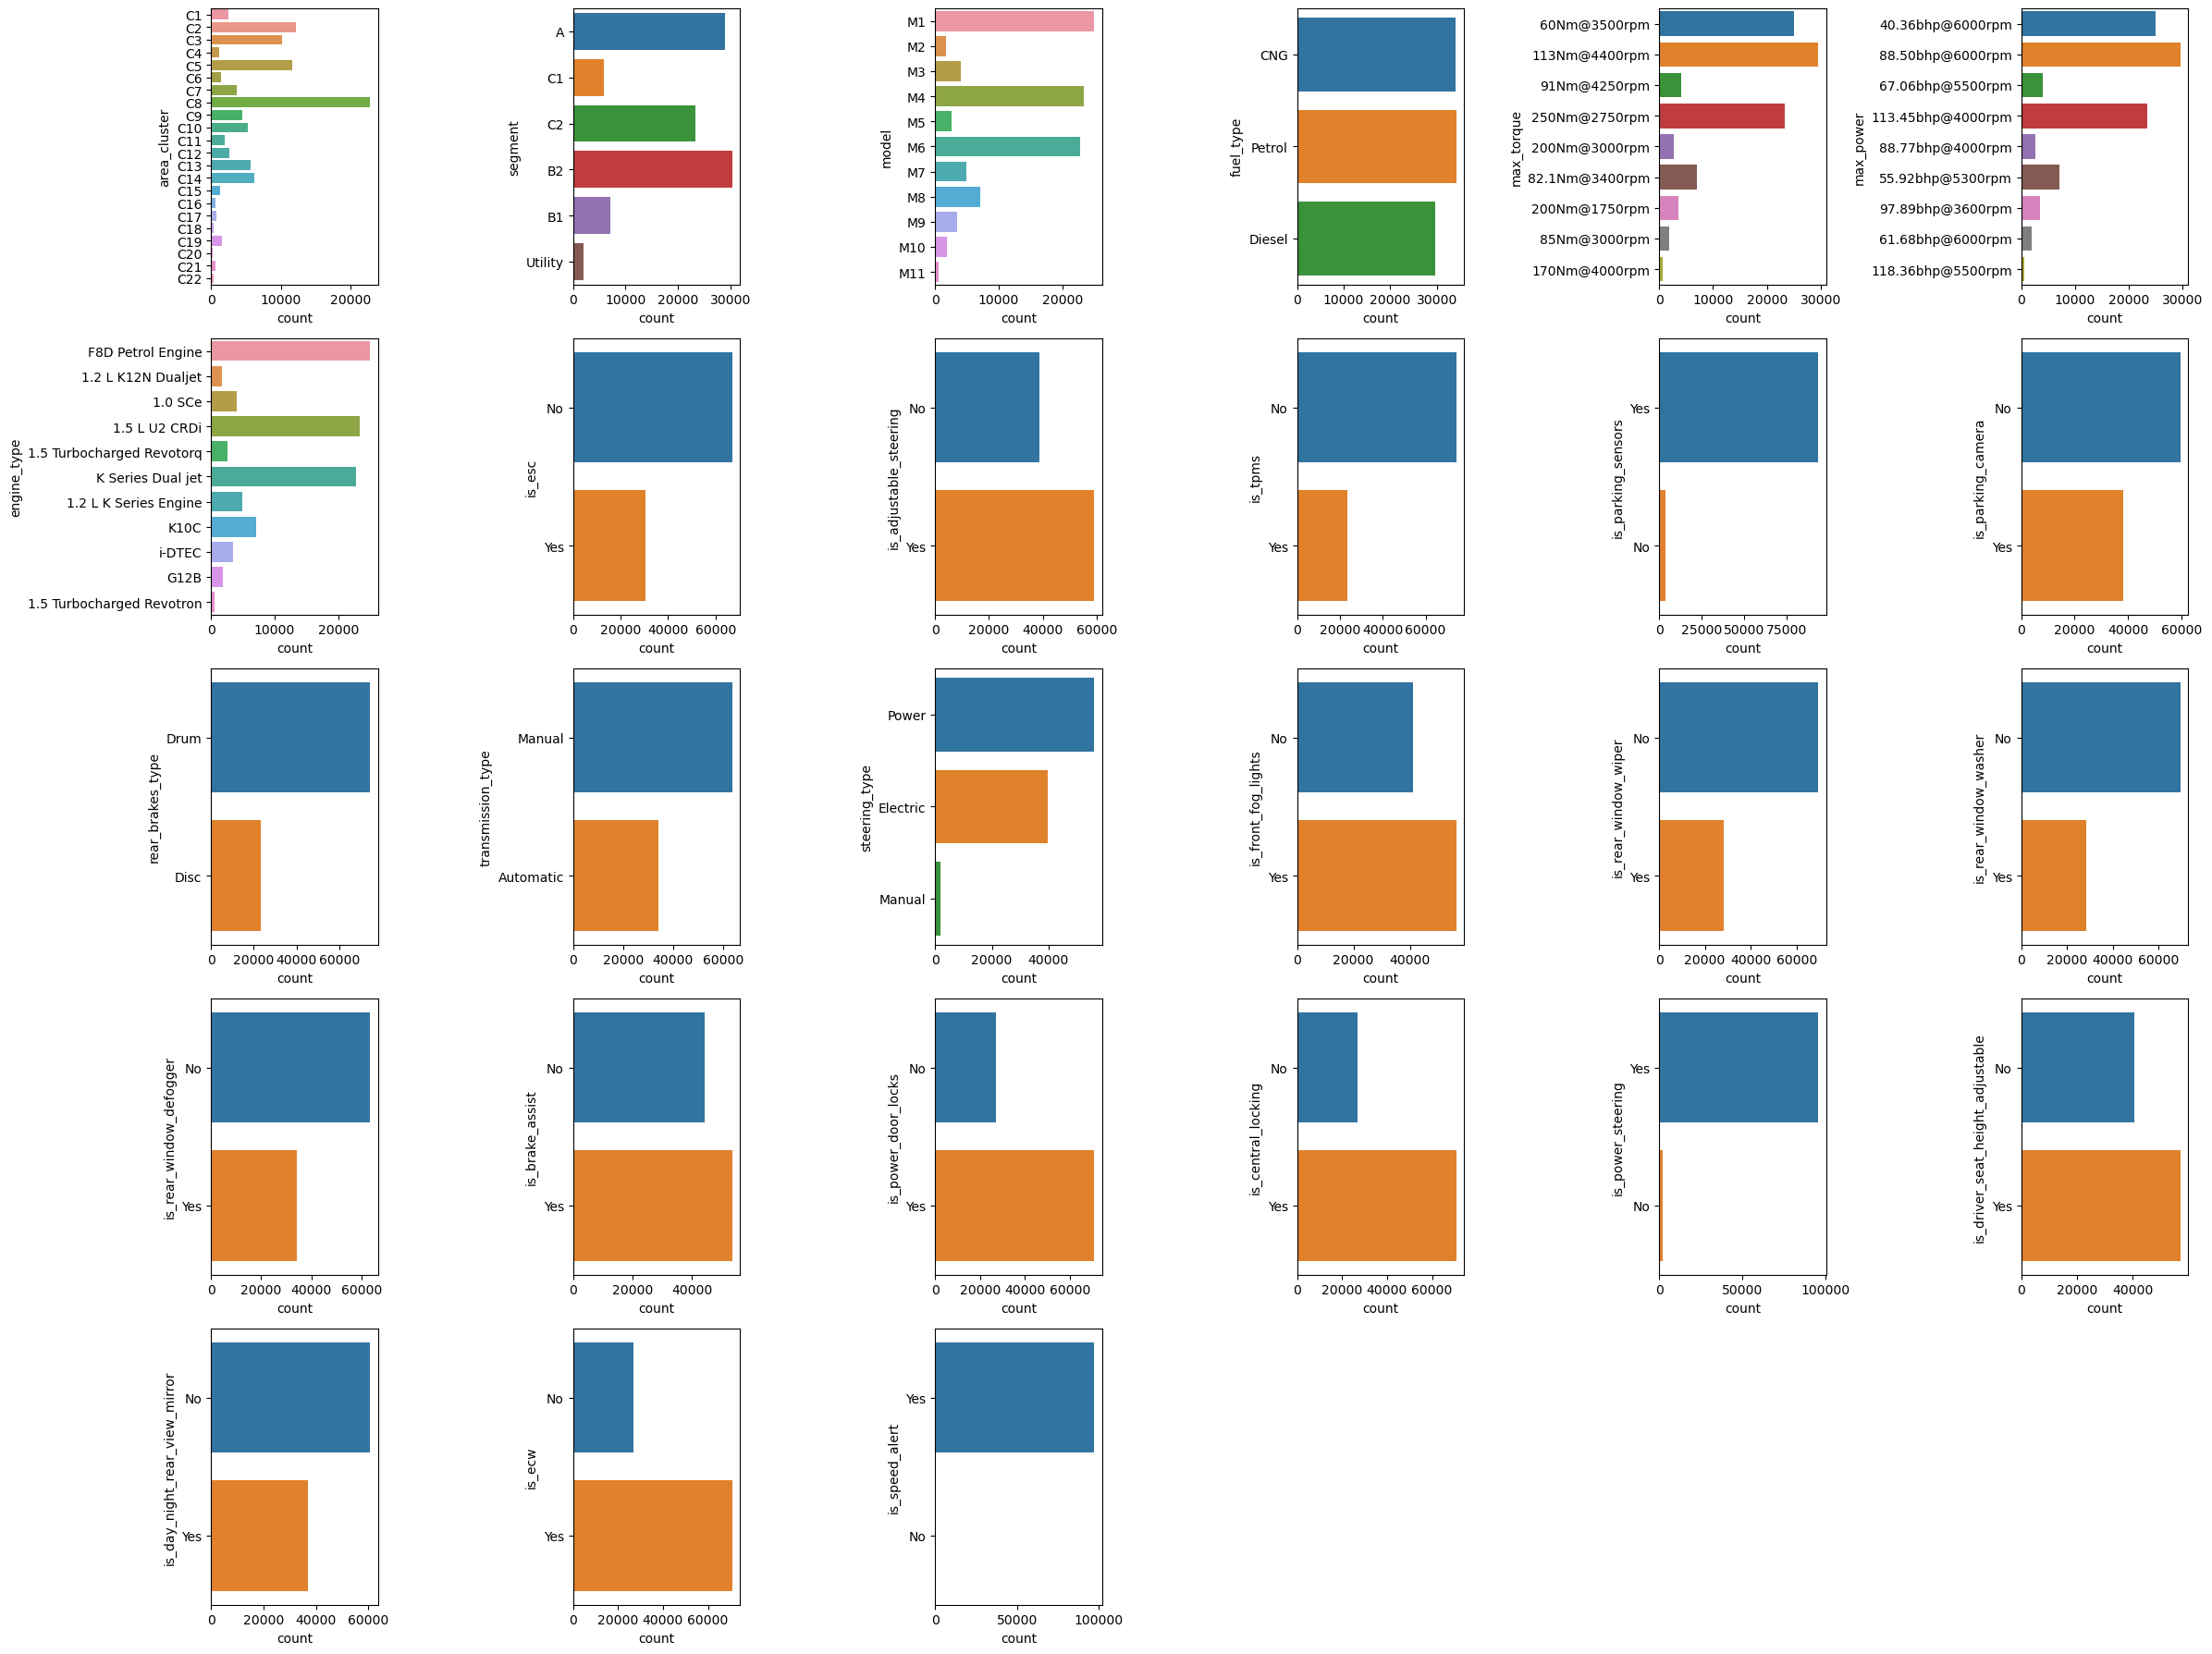

In [324]:
plt.figure(dpi=400)
cat_cols = data.select_dtypes(include=object).columns

plt.figure(figsize=(24,18))
j=1
for i in cat_cols[1:]:
    plt.subplot(5,6,j)
    sns.countplot(y=data[i])
    j+=1
plt.tight_layout()
plt.show()

In [414]:
# plt.figure(figsize=(12,6))
# j=1
# for i in data.select_dtypes(include=np.number).columns[[4,5,7,8,13,15]]:
#     plt.subplot(2,3,j)
#     sns.countplot(y=data[i])
#     j+=1
# plt.tight_layout()
# plt.show()

In [7]:
# INFERENCES THROUGH UNIVARIATE ANALYSIS :

cat_vars=['area_cluster','segment','model','fuel_type','engine_type','is_esc','is_adjustable_steering','is_tpms',\
          'is_parking_sensors','is_parking_camera','rear_brakes_type','transmission_type','steering_type',\
          'is_front_fog_lights','is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger',\
          'is_brake_assist','is_power_door_locks','is_central_locking','is_power_steering',\
          'is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw','is_speed_alert']

num_vars = ['policy_tenure','age_of_car','age_of_policyholder','population_density','make','airbags',\
            'displacement','cylinder','gear_box','turning_radius','length','width','height','gross_weight',\
            'ncap_rating','is_claim']

##### 
# BIVARIATE ANALYSIS
---------------------------------

##### 
### NUMERICAL COLUMNS
##### 

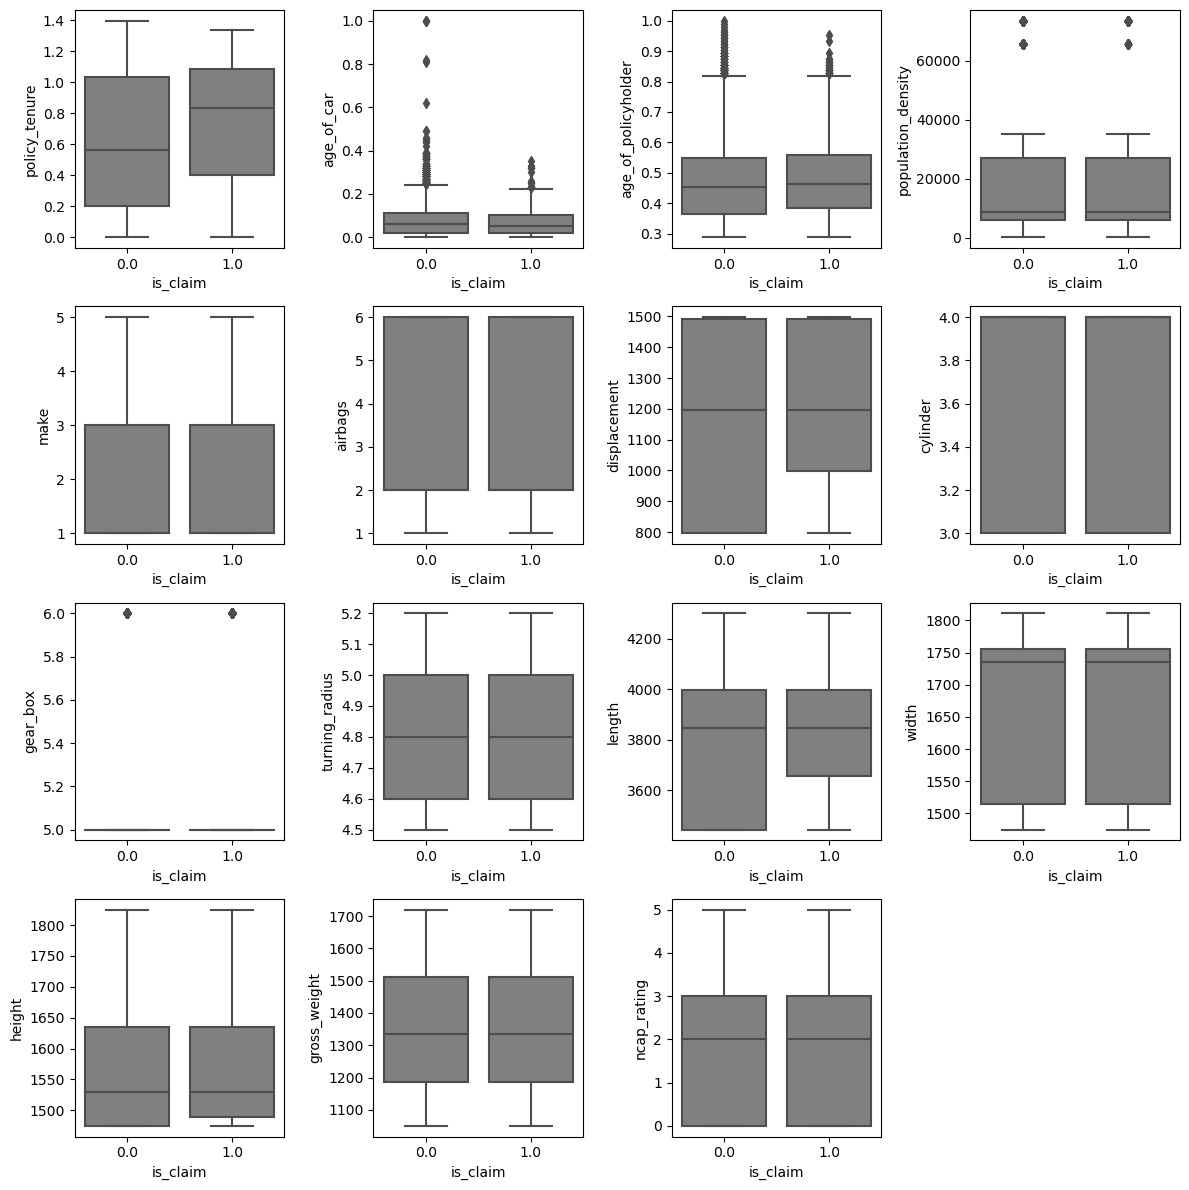

In [327]:
num_cols = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(12,12))
j=1
for i in num_vars[:-1]:
    plt.subplot(4,4,j)
    sns.boxplot(data.is_claim,data[i],color='grey')
    j+=1
plt.tight_layout()
plt.show()

##### 
### CATEGORICAL COLUMNS
##### 

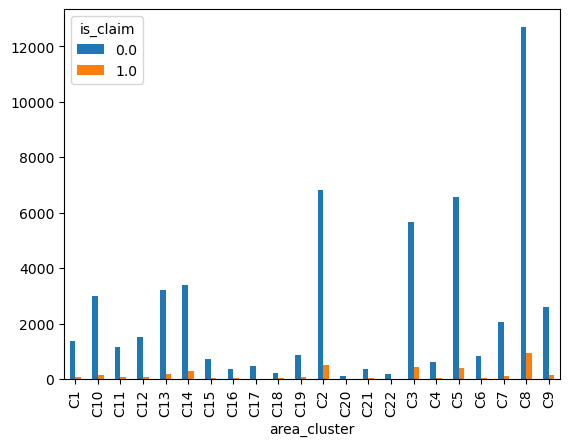

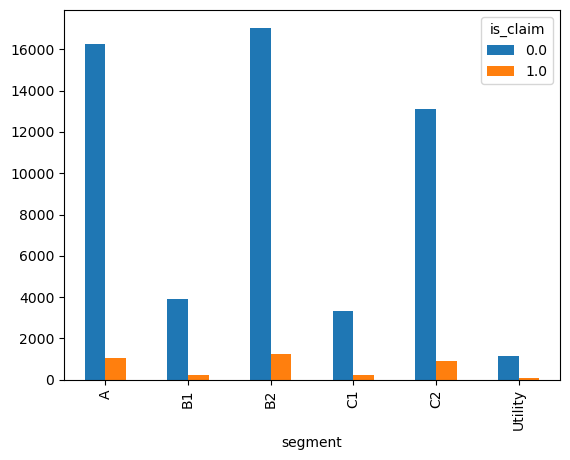

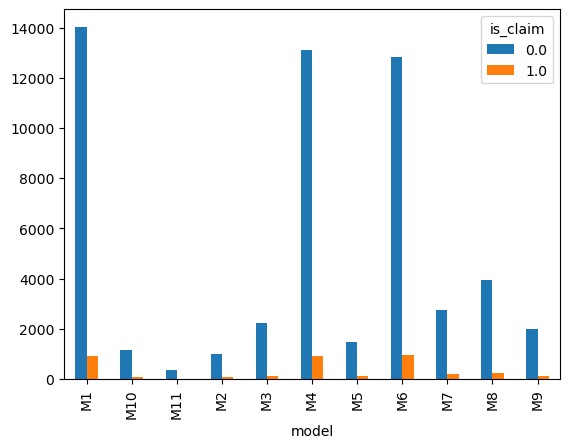

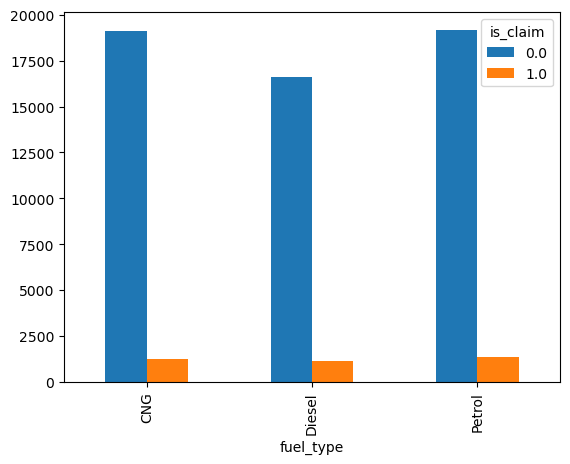

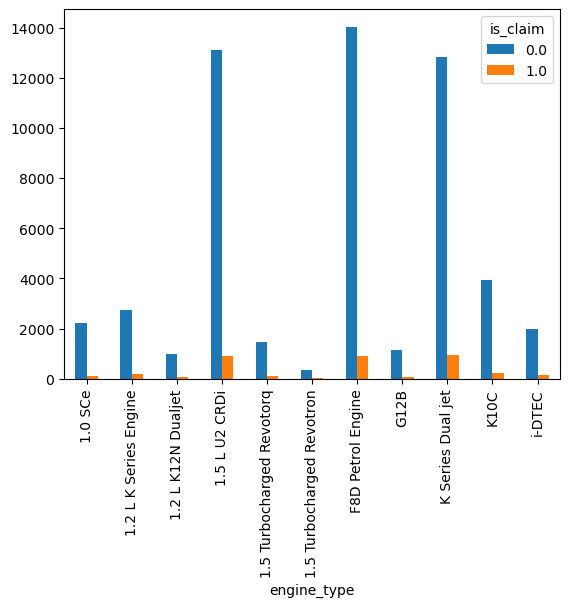

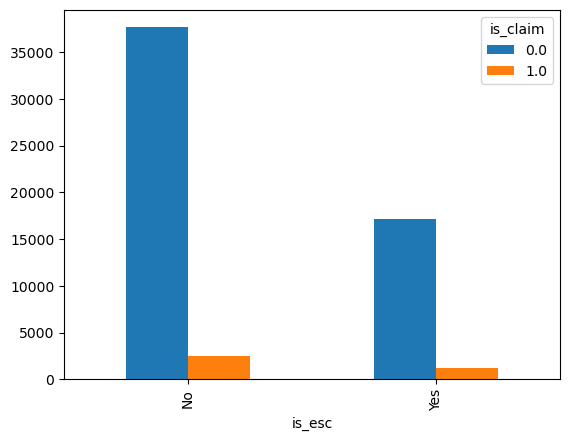

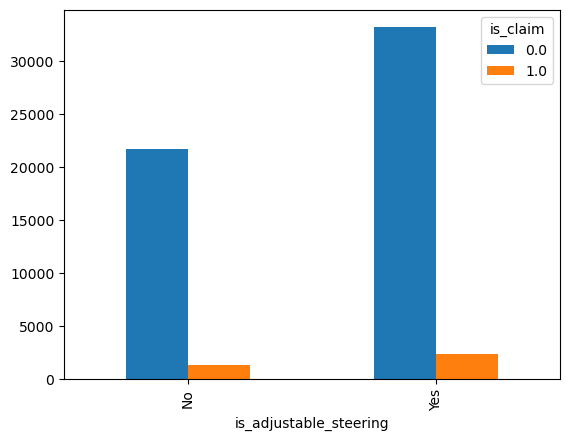

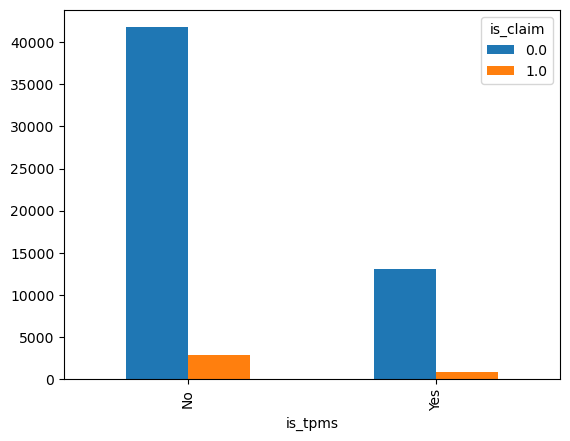

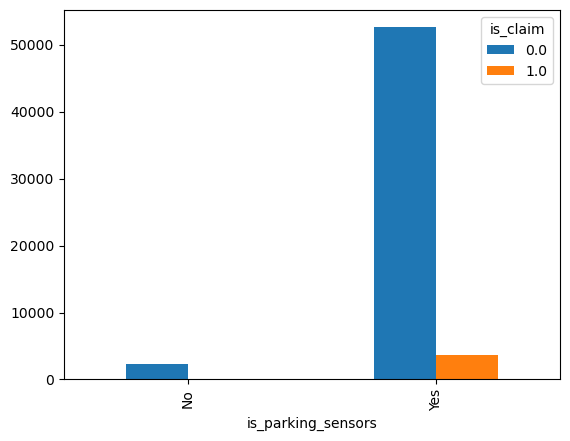

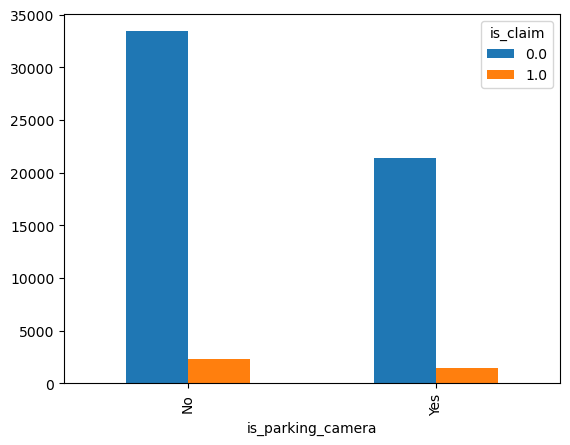

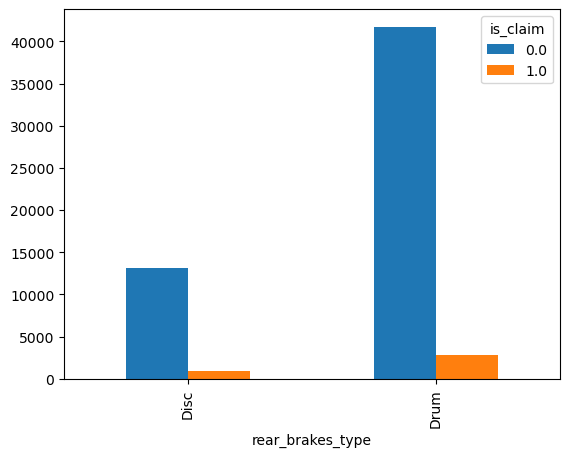

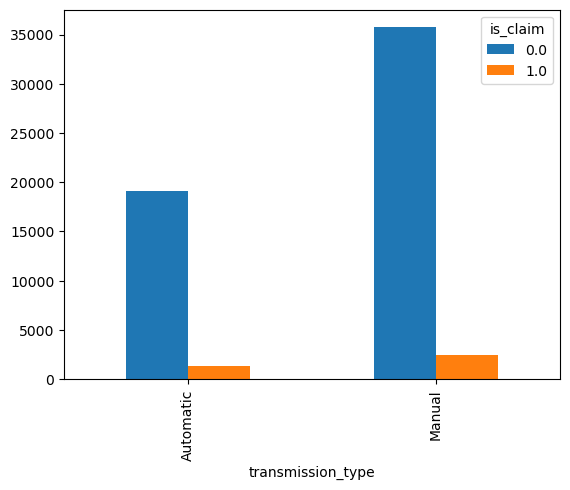

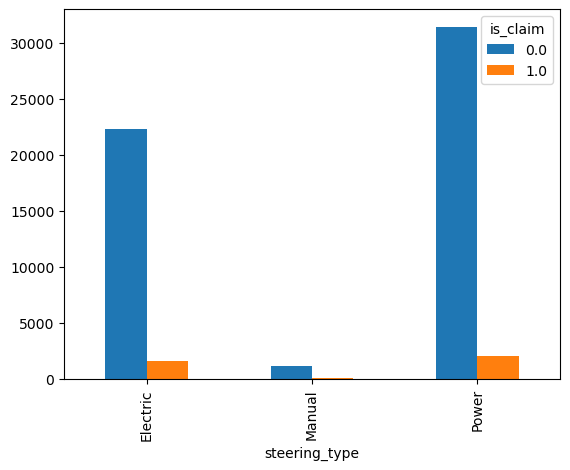

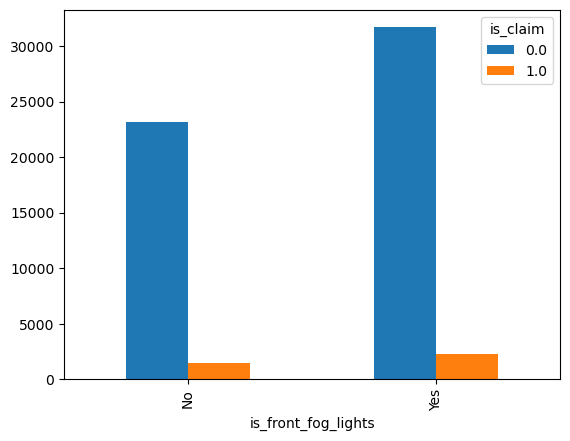

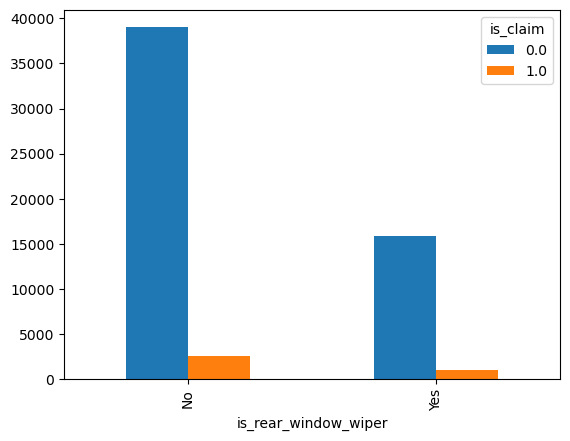

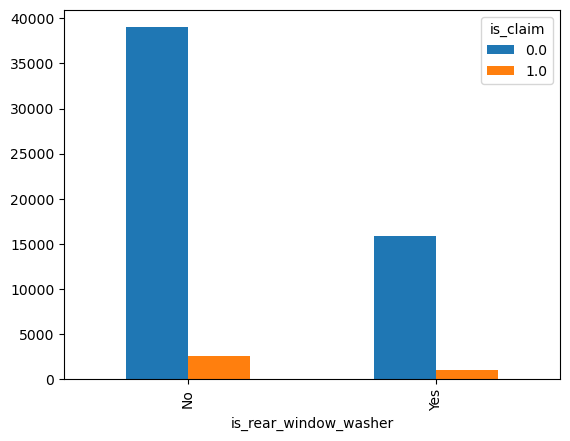

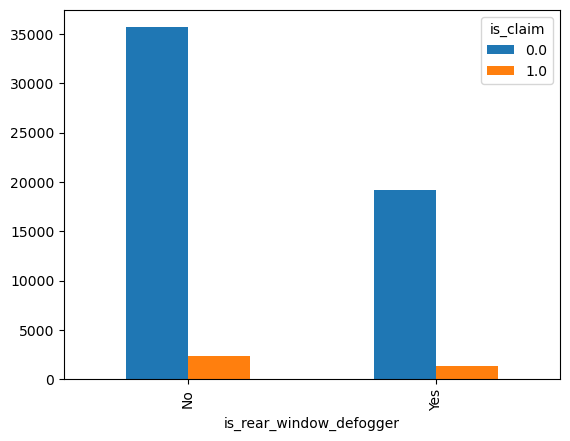

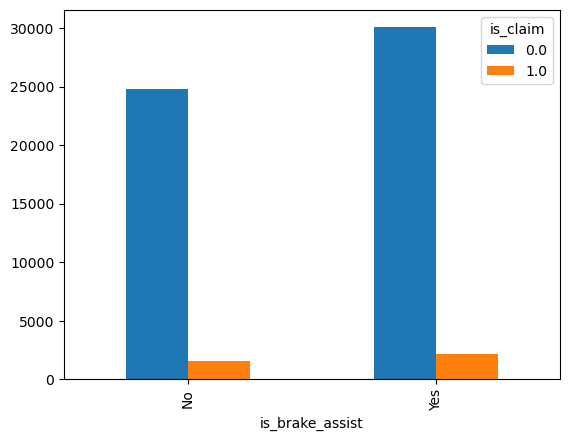

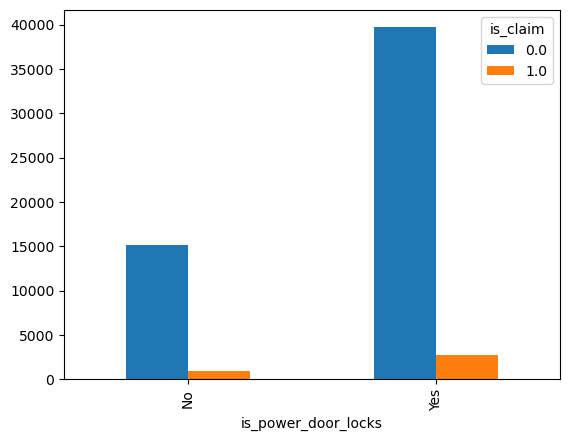

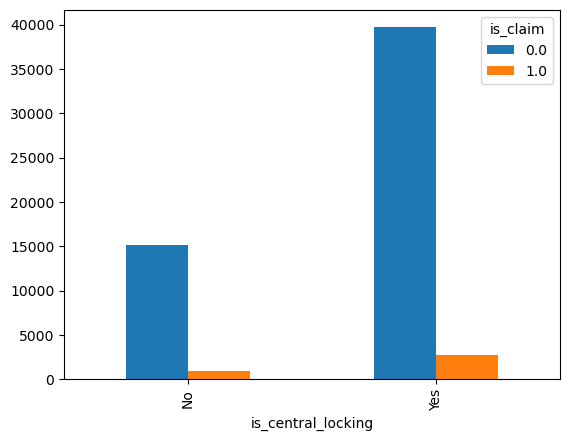

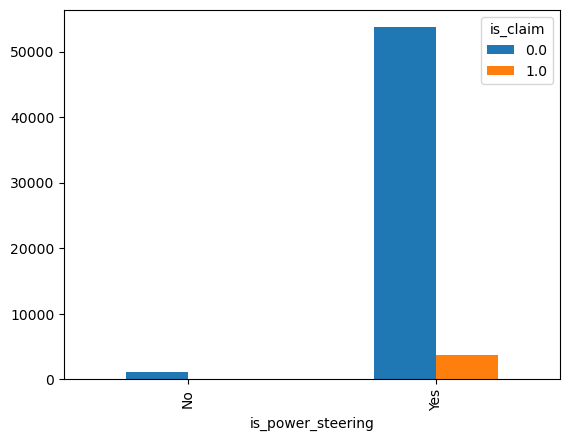

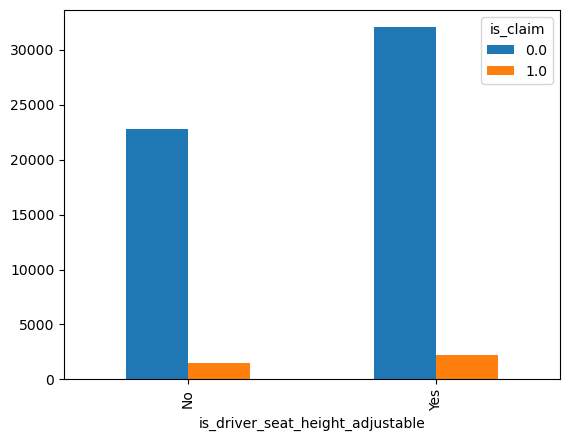

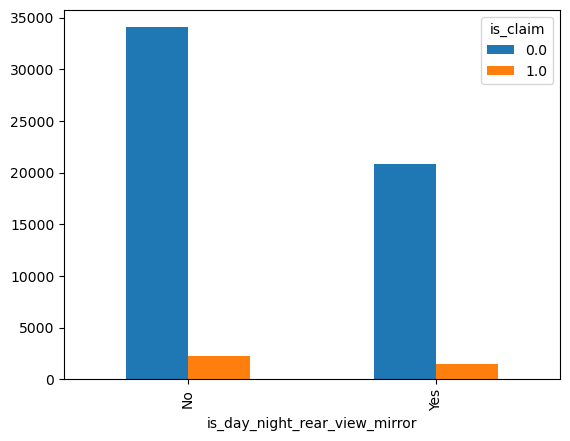

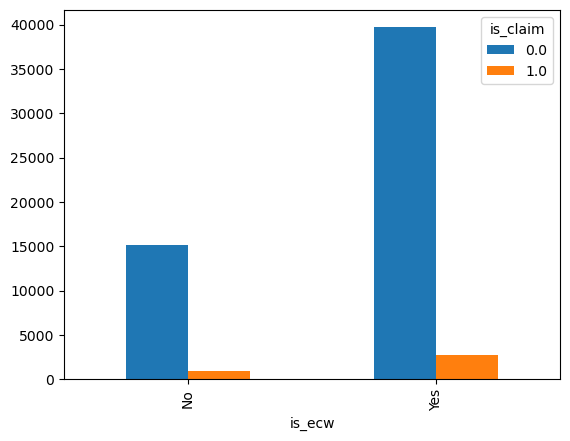

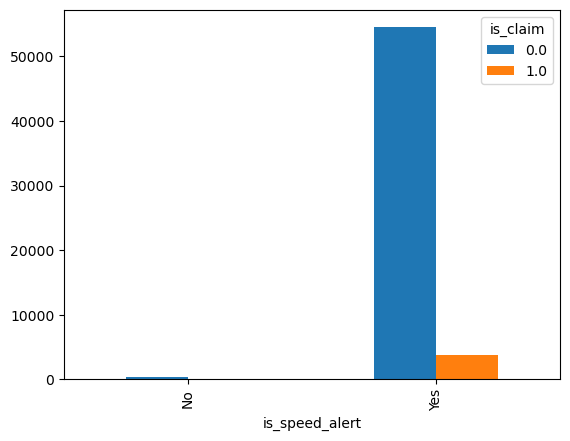

In [328]:
for i in cat_vars:
    pd.crosstab(data[i],data.is_claim).plot(kind='bar')

##### 
# STATISTICAL ANALYSIS
##### 

In [8]:
imp_feats_num = []
for i in num_vars[:-1]:
    z1 = data.loc[data.is_claim==0,i]
    z2 = data.loc[data.is_claim==1,i]
    _,pvalue = stats.ttest_ind(z1,z2,alternative='two-sided')
    if pvalue<0.05:
        imp_feats_num.append(i)
imp_feats_num

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'cylinder',
 'width']

In [9]:
imp_feats_cat = []
for i in cat_vars:
    teststat,pvalue,dof,exp_fr = stats.chi2_contingency(pd.crosstab(data.is_claim,data[i]))
    if pvalue<0.05:
        imp_feats_cat.append(i)
imp_feats_cat

['area_cluster',
 'segment',
 'model',
 'engine_type',
 'is_adjustable_steering',
 'is_parking_sensors',
 'is_front_fog_lights',
 'is_brake_assist',
 'is_driver_seat_height_adjustable']

In [10]:
# Important features as per statistical analysis

imp_feats = imp_feats_num + imp_feats_cat
print('Number of features :',len(imp_feats),'\n\nList of Features :\n\n',imp_feats)

Number of features : 15 

List of Features :

 ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'cylinder', 'width', 'area_cluster', 'segment', 'model', 'engine_type', 'is_adjustable_steering', 'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable']


##### 
# FEATURE ENGINEERING
##### 

In [11]:
# Max Torque

data[['nm_torque','rpm_torque']]=(data.max_torque.str.split('@',expand=True))

In [12]:
# Max Power

data[['hp','rpm_power']]=(data.max_power.str.split('@',expand=True))

In [13]:
#data.drop(columns=['max_torque','max_power'],inplace=True)

In [14]:
data.nm_torque = data.nm_torque.str.split('N',expand=True)[0]

In [15]:
data.rpm_torque = data.rpm_torque.str.split('r',expand=True)[0]

In [16]:
data.hp = data.hp.str.split('b',expand=True)[0]

In [17]:
data.rpm_power = data.rpm_power.str.split('r',expand=True)[0]

In [18]:
for i in data.iloc[:,[44,45,46,47]].columns:
    data[i] = data[i].astype(float)

In [19]:
#data.drop('policy_id',axis=1,inplace=True)

In [20]:
# Replacing 'No' with 0 and 'Yes' with 1

li=[]
for i in data.select_dtypes(include=object).columns:
    if len(data[i].unique())==2 and 'Yes' in data[i].unique():
        li.append(i)

for i in li:
    data[i][data[i]=='Yes']=1
    data[i][data[i]=='No']=0

In [21]:
data.head()    # data is combined data of train and test

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,1,1,1,1,2,0.0,113.0,4400.0,88.50,6000.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,0,1,1,1,2,0.0,91.0,4250.0,67.06,5500.0


In [22]:
data['per_unit_torque'] = data.nm_torque/data.rpm_torque
data['per_unit_power'] = data.rpm_power/data.hp

In [23]:
data.engine_type.unique()

array(['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe',
       '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet',
       '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B',
       '1.5 Turbocharged Revotron'], dtype=object)

In [24]:
data['age_prop'] = data.age_of_car/data.age_of_policyholder

In [25]:
data['magic1'] = data.groupby('area_cluster')['policy_id'].transform('nunique')

In [26]:
data['magic2'] = data.magic1/data.population_density

In [27]:
# Generating features through statistics

data['magic3'] = data.groupby('area_cluster')['policy_tenure'].transform('min')
data['magic4'] = data.groupby('area_cluster')['policy_tenure'].transform('max')
data['magic5'] = data.groupby('area_cluster')['policy_tenure'].transform('mean')
data['magic6'] = data.groupby('area_cluster')['policy_tenure'].transform('median')

In [28]:
data.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,6000.0,0.017143,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,6000.0,0.017143,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343


In [29]:
# statistically magic 4 feature is not good.

In [30]:
stats.chi2_contingency(pd.crosstab(data.engine_type,data.is_claim))[1]

0.029490222196639326

In [31]:
stats.chi2_contingency(pd.crosstab(data.engine_type,data.model))[1]

0.0

In [32]:
stats.chi2_contingency(pd.crosstab(data.model,data.is_claim))[1]

0.02949022219663932

<AxesSubplot:xlabel='model'>

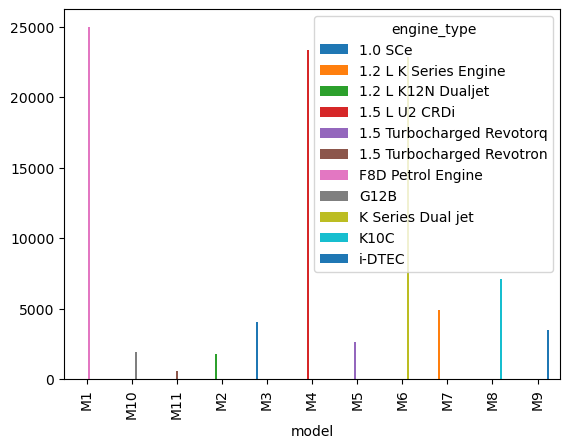

In [33]:
pd.crosstab(data.model,data.engine_type).plot(kind='bar')

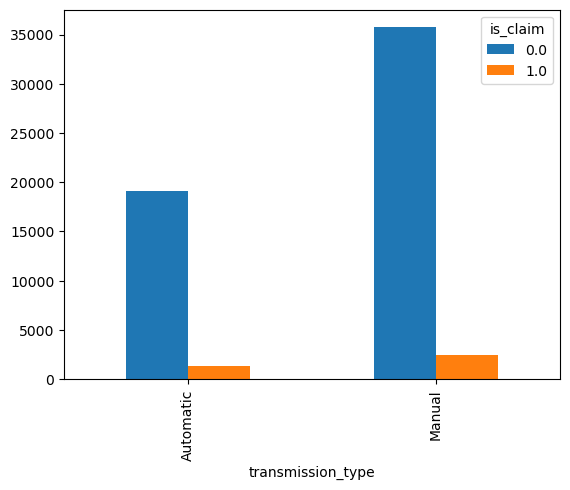

In [34]:
pd.crosstab(data.transmission_type,data.is_claim).plot(kind='bar')

data.transmission_type = np.where(data.transmission_type=='Manual',1,0)

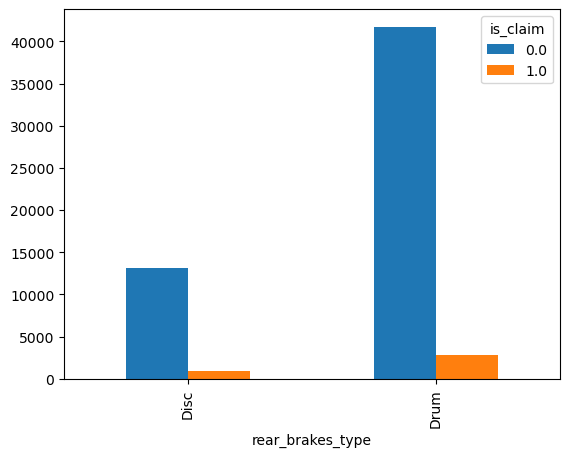

In [35]:
pd.crosstab(data.rear_brakes_type,data.is_claim).plot(kind='bar')

data.rear_brakes_type = np.where(data.rear_brakes_type=='Drum',1,0)

<AxesSubplot:xlabel='steering_type'>

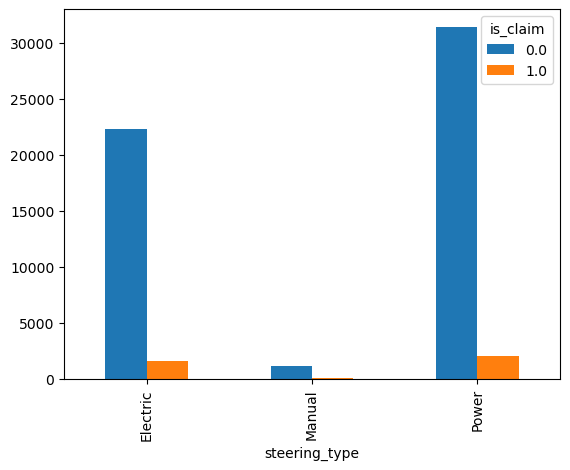

In [36]:
pd.crosstab(data.steering_type,data.is_claim).plot(kind='bar')

In [37]:
#pip install category_encoders

In [41]:
tgt.fit_transform(data.loc[:,cols],data.is_claim)

,area_cluster,steering_type,engine_type,model,fuel_type,segment
0,0.051771,0.062026,0.061413,0.061413,0.060748,0.060389
1,0.070825,0.062026,0.061413,0.061413,0.060748,0.060389
2,0.070972,0.062026,0.061413,0.061413,0.060748,0.060389
3,0.076692,0.066873,0.074074,0.074074,0.066384,0.064099
4,0.057745,0.066873,0.053940,0.053940,0.066384,0.060389
...,...,...,...,...,...,...
97650,0.070825,0.066873,0.068162,0.068162,0.066384,0.068581
97651,0.069870,0.062026,0.064275,0.064275,0.064862,0.064275
97652,0.061798,0.066873,0.068367,0.068367,0.066384,0.068581
97653,0.057745,0.066873,0.074074,0.074074,0.066384,0.064099


In [42]:
data.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'nm_torque',
       'rpm_torque', 'hp', 'rpm_power', 'per_unit_torque', 'per_unit_power',
       'age_prop', 'magic1', 'magic2', 'magic3', 'magic4', 'magic5',

In [43]:
data.drop(columns=['policy_id','max_torque','max_power','magic4'],inplace=True)

In [50]:
# Train , test split

newtrain = data.loc[0:train.shape[0]-1,:]
newtest = data.loc[train.shape[0]:,:]

newtrain.shape , newtest.shape

((58592, 53), (39063, 53))

In [ ]:
# drop the target variable from train and test

X = newtrain.drop('is_claim',axis=1)
y = newtrain.is_claim

newtest = newtest.drop('is_claim',axis=1)
ytest = newtest.is_claim

In [52]:
# Target Encoding in remaining columns because number of categories is more than 2

cols = ['area_cluster','steering_type','engine_type','model','fuel_type','segment']

import category_encoders as ce

tgt = ce.TargetEncoder(cols)

In [53]:
newx = tgt.fit_transform(X,y)
test_encoded = tgt.transform(newtest)

In [54]:
newx['per_unit_vol'] = (newx.gross_weight/(newx.height*newx.width*newx.length))
test_encoded['per_unit_vol'] = test_encoded.gross_weight/(test_encoded.height*test_encoded.width*test_encoded.length)

In [55]:
sc = StandardScaler()

scale_cols = ['policy_tenure','population_density','displacement','length','width','height','gross_weight',\
              'nm_torque','rpm_torque','hp','rpm_power','per_unit_torque','per_unit_power','magic1','magic3','magic5','magic6']

newx.loc[:,scale_cols]=sc.fit_transform(newx.loc[:,scale_cols])
test_encoded.loc[:,scale_cols]=sc.transform(test_encoded.loc[:,scale_cols])

newx=newx.drop('model',axis=1)
test_encoded=test_encoded.drop('model',axis=1)

##### 
# MODELLING
-------------------------
##### 

In [640]:
# RandomForest

rf = RandomForestClassifier()
model = rf.fit(newx,y)
pred = model.predict(test_encoded)

In [627]:
f1_score(y,model.predict(newx))

0.0

In [631]:
submission = test.iloc[:,0]

In [632]:
submission=pd.concat((submission,pd.Series(model.predict(test_encoded))),axis=1)
submission

,policy_id,0
0,ID58593,1.0
1,ID58594,1.0
2,ID58595,1.0
3,ID58596,0.0
4,ID58597,0.0
...,...,...
39058,ID97651,0.0
39059,ID97652,1.0
39060,ID97653,0.0
39061,ID97654,0.0


In [633]:
submission.columns = ['policy_id','is_claim']

In [634]:
submission.to_csv('meramodel.csv',index=False)

In [637]:
cd

C:\Users\prabh


In [56]:
# Apply Smote

from imblearn.over_sampling import SMOTE

smote = SMOTE()

# Resample

smotex , smotey = smote.fit_resample(newx,y)

In [57]:
# RandomForest

rf = RandomForestClassifier()
model = rf.fit(smotex,smotey)
pred = model.predict(test_encoded)

In [646]:
submission = test.iloc[:,0]

submission=pd.concat((submission,pd.Series(pred)),axis=1)
submission.columns = ['policy_id','is_claim']

In [649]:
submission.to_csv('meramodel2.csv',index=False)

In [650]:
cd

C:\Users\prabh


In [654]:
lr = LogisticRegression()
model = lr.fit(smotex,smotey)
f1_score(smotey,model.predict(smotex))

0.5853566452424828

In [657]:
ypred=model.predict(test_encoded)
submission = test.iloc[:,0]

submission=pd.concat((submission,pd.Series(ypred)),axis=1)
submission.columns = ['policy_id','is_claim']

In [660]:
submission.to_csv('meramodel3.csv',index=False)

In [59]:
from sklearn.model_selection import StratifiedKFold
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gbm = GradientBoostingClassifier()
ada = AdaBoostClassifier()

In [103]:
li = []
for i in [lr,dt,rf,nb,knn,xgb,gbm,ada]:
    model = i.fit(smotex,smotey)
    pred=model.predict(test_encoded)
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score = cross_val_score(i,smotex,smotey,scoring='f1',cv=cv,error_score='raise') 
    li.append((i,pred,score))
print(li)

[(LogisticRegression(), array([0., 0., 0., ..., 0., 1., 0.]), array([0.5867205 , 0.59259921, 0.58960525, 0.58563932, 0.58619761])), (DecisionTreeClassifier(), array([0., 0., 0., ..., 0., 0., 0.]), array([0.91376593, 0.91300424, 0.91304937, 0.91689613, 0.91208142])), (RandomForestClassifier(), array([0., 0., 0., ..., 0., 1., 0.]), array([0.90826932, 0.90747025, 0.90336325, 0.90758272, 0.90298813])), (GaussianNB(), array([0., 1., 0., ..., 1., 1., 0.]), array([0.59188564, 0.61411399, 0.59949139, 0.6036151 , 0.59370679])), (KNeighborsClassifier(), array([1., 0., 0., ..., 0., 1., 0.]), array([0.83820391, 0.83590082, 0.83283975, 0.83395591, 0.83543162])), (XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=Non

In [109]:
for i in li:
    print(i[1],np.mean(i[2]))

[0. 0. 0. ... 0. 1. 0.] 0.5881523807527432
[0. 0. 0. ... 0. 0. 0.] 0.9137594187465478
[0. 0. 0. ... 0. 1. 0.] 0.905934734197929
[0. 1. 0. ... 1. 1. 0.] 0.6005625838496428
[1. 0. 0. ... 0. 1. 0.] 0.8352664007625922
[0 0 0 ... 0 0 0] 0.9595812562067945
[1. 0. 0. ... 0. 0. 0.] 0.8854483378643605
[1. 0. 0. ... 1. 1. 0.] 0.7187993586725555


In [63]:
from sklearn.ensemble import StackingClassifier

In [98]:
stacking = StackingClassifier(estimators=[('rf',RandomForestClassifier()),\
                                          ('xgb',XGBClassifier()),('ada',AdaBoostClassifier())],\
                                          final_estimator=RandomForestClassifier(),cv=cv)

In [101]:
pred_stack=stacking.fit(smotex,smotey).predict(test_encoded)

In [102]:
pred_stack

array([0., 0., 0., ..., 0., 0., 0.])